In [1]:
from matplotlib.pyplot import imread, imshow, subplots, show
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os
import cv2
import numpy as np
import zipfile
from os import listdir
from os.path import isfile, join

In [2]:
IMG_SIZE = 612

In [3]:
path_trainDIB = 'diabetic_images'

In [4]:
n = 
for filename in os.listdir(path_trainDIB):
    image_trainDIB = cv2.imread(f"{path_trainDIB}/{filename}")
    image_trainDIB = cv2.cvtColor(image_trainDIB, cv2.COLOR_BGR2GRAY)
    image_trainDIB = cv2.resize(image_trainDIB, (IMG_SIZE, IMG_SIZE))
    image_trainDIB = cv2.addWeighted(image_trainDIB,4, cv2.GaussianBlur(image_trainDIB, (0,0) , 40), -4, 128)
    cv2.imwrite(f"Data_Kurangi_Filter/Training/diabetic_images/Diabetes_{n}.png", image_trainDIB)
    n += 1

In [ ]:
path_trainNonDIB = 'normal_images'

In [17]:
n = 1
for filename in os.listdir(path_trainNonDIB):
    image_trainNonDIB = cv2.imread(f"{path_trainNonDIB}/{filename}")
    image_trainNonDIB = cv2.cvtColor(image_trainNonDIB, cv2.COLOR_BGR2GRAY)
    image_trainNonDIB = cv2.resize(image_trainNonDIB, (IMG_SIZE, IMG_SIZE))
    image_trainNonDIB = cv2.addWeighted(image_trainNonDIB,4, cv2.GaussianBlur(image_trainNonDIB, (0,0) , 40), -4, 128)
    cv2.imwrite(f"Data_Kurangi_Filter/Training/normal_images/NonDiabetes_{n}.png", image_trainNonDIB)
    n += 1

In [18]:
path_testDIB = 'diabetic_images'

In [19]:
n = 1
for filename in os.listdir(path_testDIB):
    image_testDIB = cv2.imread(f"{path_testDIB}/{filename}")
    image_testDIB = cv2.cvtColor(image_testDIB, cv2.COLOR_BGR2GRAY)
    image_testDIB = cv2.resize(image_testDIB, (IMG_SIZE, IMG_SIZE))
    image_testDIB = cv2.addWeighted(image_testDIB,4, cv2.GaussianBlur(image_testDIB, (0,0) , 40), -4, 128)
    cv2.imwrite(f"Data_Kurangi_Filter/Testing/diabetic_images/Diabetes_{n}.png", image_testDIB)
    n += 1

In [20]:
path_testNonDIB = 'normal_images'

In [21]:
n = 1
for filename in os.listdir(path_testNonDIB):
    image_testNonDIB = cv2.imread(f"{path_testNonDIB}/{filename}")
    image_testNonDIB = cv2.cvtColor(image_testNonDIB, cv2.COLOR_BGR2GRAY)
    image_testNonDIB = cv2.resize(image_testNonDIB, (IMG_SIZE, IMG_SIZE))
    image_testNonDIB = cv2.addWeighted(image_testNonDIB,4, cv2.GaussianBlur(image_testNonDIB, (0,0) , 40), -4, 128)
    cv2.imwrite(f"Data_Kurangi_Filter/Testing/normal_images/NonDiabetes_{n}.png", image_testNonDIB)
    n += 1

In [7]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [8]:
print('total diabetes training images : ', len (os.listdir('Data_Kurangi_Filter/Training/diabetic_images')))
print('total non diabetes training images : ', len (os.listdir('Data_Kurangi_Filter/Training/normal_images')))
print('total diabetes testing images : ', len (os.listdir('Data_Kurangi_Filter/Testing/diabetic_images')))
print('total non diabetes testing images : ', len (os.listdir('Data_Kurangi_Filter/Testing/normal_images')))

total diabetes training images :  200
total non diabetes training images :  200
total diabetes testing images :  200
total non diabetes testing images :  200


In [9]:
train_dir = os.path.join('Data_Kurangi_Filter/Training')
testing_dir = os.path.join('Data_Kurangi_Filter/Testing')

In [10]:
class_names = ['Diabetic', 'Normal']
print(class_names)

['Diabetic', 'Normal']


In [11]:
#Augmentasi Gambar
train_datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    zoom_range=0.3,
    shear_range=0.2,
    validation_split=0.1
)

In [12]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='categorical',
    subset='training'
)

Found 360 images belonging to 2 classes.


In [13]:
train_generator.class_indices

{'diabetic_images': 0, 'normal_images': 1}

In [14]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='categorical',
    subset='validation'    
)

Found 40 images belonging to 2 classes.


In [15]:
validation_generator.class_indices

{'diabetic_images': 0, 'normal_images': 1}

In [16]:
model = Sequential()
#Proses Ekstraksi
model.add(Conv2D(64,input_shape=(150,150,3),kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(256,kernel_size=(3,3), activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
#connected network
model.add(Flatten())
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=512,activation="relu"))
model.add(Dense(units=2,activation="softmax"))

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 74, 74, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 17, 17, 256)     

In [18]:
# Model Optimizer
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adamax(learning_rate=0.001), metrics=['accuracy'])

In [32]:
epoch = 150
history = model.fit(train_generator,validation_data=validation_generator,epochs=epoch,verbose=2,steps_per_epoch=50,validation_steps=5)

Epoch 1/150
50/50 - 73s - loss: 0.6828 - accuracy: 0.6000 - val_loss: 0.6775 - val_accuracy: 0.5500 - 73s/epoch - 1s/step
Epoch 2/150
50/50 - 61s - loss: 0.6878 - accuracy: 0.5700 - val_loss: 0.6907 - val_accuracy: 0.5500 - 61s/epoch - 1s/step
Epoch 3/150
50/50 - 57s - loss: 0.6844 - accuracy: 0.5600 - val_loss: 0.6833 - val_accuracy: 0.6500 - 57s/epoch - 1s/step
Epoch 4/150
50/50 - 58s - loss: 0.6930 - accuracy: 0.5500 - val_loss: 0.6861 - val_accuracy: 0.6000 - 58s/epoch - 1s/step
Epoch 5/150
50/50 - 59s - loss: 0.6779 - accuracy: 0.5750 - val_loss: 0.6237 - val_accuracy: 0.6500 - 59s/epoch - 1s/step
Epoch 6/150
50/50 - 57s - loss: 0.6687 - accuracy: 0.6300 - val_loss: 0.5771 - val_accuracy: 0.9000 - 57s/epoch - 1s/step
Epoch 7/150
50/50 - 58s - loss: 0.6380 - accuracy: 0.6450 - val_loss: 0.6991 - val_accuracy: 0.6500 - 58s/epoch - 1s/step
Epoch 8/150
50/50 - 57s - loss: 0.7034 - accuracy: 0.5100 - val_loss: 0.6769 - val_accuracy: 0.6000 - 57s/epoch - 1s/step
Epoch 9/150
50/50 - 57s 

In [19]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(150)

plt.figure(figsize=(28, 12))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: name 'history' is not defined

In [20]:
from keras.utils.vis_utils import plot_model

plot_model(model,to_file='model.png', show_shapes=True, show_dtype=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


**Prediksi**

1/1 [==============================] - 0s 387ms/step
Citra ini cenderung dikategorikan ke kategori Diabetic dengan 71.67 persen confidence.


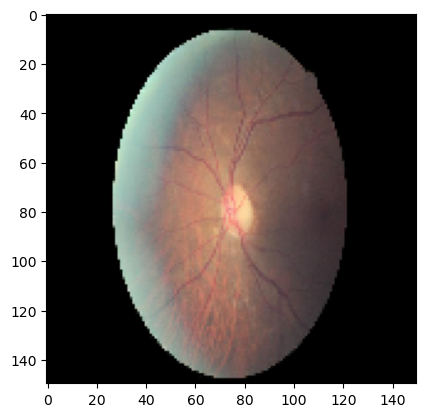

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

import keras
IMG_SIZE = 512
Pred_Path ="normal_images/10_left.jpeg"
Pred_result_Path = "Prediksi.png"

img = cv2.imread(Pred_Path)
img_process = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_process = cv2.resize(img_process, (IMG_SIZE, IMG_SIZE))
img_process = cv2.addWeighted(img_process,4, cv2.GaussianBlur(img_process, (0,0), 40), -4,128)
cv2.imwrite(Pred_result_Path, img_process)

import keras
img_plot = load_img(Pred_Path, target_size=(150,150))
img_pred = load_img(Pred_result_Path, target_size=(150,150))
img_array = img_to_array(img_pred)
img_array = tf.expand_dims(img_array, 0) 

predictions = model.predict(img_array)
score = tf.nn.sigmoid(predictions[0])
imgplot = plt.imshow(img_plot)

print(
    "Citra ini cenderung dikategorikan ke kategori {} dengan {:.2f} persen confidence."
    .format(class_names[np.argmax(score)], 100* np.max(score))
)



In [26]:
Testing_datagen = ImageDataGenerator(rescale=1./255)

In [27]:
test_generator = Testing_datagen.flow_from_directory(
    testing_dir,
    target_size=(150,150),
    batch_size=4,
    class_mode='categorical'
)

Found 400 images belonging to 2 classes.


In [28]:
test_accu = model.evaluate(test_generator)
print('Hasil pengujian akurasi adalah :',test_accu[1]*100, '%')

100/100 [==============================] - 12s 112ms/step - loss: 0.6939 - accuracy: 0.5000
Hasil pengujian akurasi adalah : 50.0 %


In [41]:
model.save('ModelDR.h5')

In [43]:
new_model = tf.keras.models.load_model('ModelDR.h5')

new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 256)       295168    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 256)      0

In [44]:
test_accu = new_model.evaluate(test_generator)
print('The testing accuracy is :',test_accu[1]*100, '%')

100/100 [==============================] - 17s 151ms/step - loss: 0.1693 - accuracy: 0.9450
The testing accuracy is : 94.49999928474426 %
